<a href="https://colab.research.google.com/github/SailaJuliaa/Proyek_analisisData/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saila Julia
- **Email:** mc459d5x2115@student.devacademy.id
- **ID Dicoding:** MC459D5X2115

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda dari tahun 2011-2012
- Bulan apa yang memiliki jumlah peminjaman tertinggi dan terendah

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [2]:
df_day = pd.read_csv("https://raw.githubusercontent.com/SailaJuliaa/Proyek_analisisData/refs/heads/main/Data/day.csv", delimiter=",")
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
df_day.shape

(731, 16)

**Insight:**
- pada ghatering, data berhasil dikumpulkan berbentuk .csv yaitu pada data day
- Pada day terdapat 731 baris dan 16 kolom data
- pada data day terdapat beberapa atribut data yaitu: instant, dteday, season, yr, month, hr, holiday, weekday, working day, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt

### Assessing Data

####**day**

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("jumlah duplikasi: ", df_day.duplicated().sum())

jumlah duplikasi:  0


In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
print("missing value:", df_day.isna().sum())

missing value: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
zero_columns = ['temp', 'atemp', 'hum', 'windspeed']
for col in zero_columns:
   zero_count = (df_day[col] == 0).sum()
   print(f'Jumlah nilai 0 pada kolom {col} adalah {zero_count}')

Jumlah nilai 0 pada kolom temp adalah 0
Jumlah nilai 0 pada kolom atemp adalah 0
Jumlah nilai 0 pada kolom hum adalah 1
Jumlah nilai 0 pada kolom windspeed adalah 0


**Insight:**
- Pada data day tidak ada duplikasi dan missing value
- Ada kesalahan pada dtype yang harus diubah yaitu di dteday, season, hr, weathersit
- Cek nilai 0 pada pada beberapa kolom

### Cleaning Data

#### day

In [10]:
datetime_col  = ["dteday"]

for columns in datetime_col:
  df_day[columns] = pd.to_datetime(df_day[columns])

In [11]:
print(df_day["dteday"].head())

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


In [12]:
print(df_day["mnth"].head())

0    1
1    1
2    1
3    1
4    1
Name: mnth, dtype: int64


In [13]:
df_day["season"] = df_day["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df_day["weathersit"] = df_day["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"})
df_day["weekday"] = df_day["weekday"].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
df_day["yr"] = df_day["yr"].map({0: 2011, 1: 2012})

In [14]:
if "instant" in df_day.columns:
    df_day.drop("instant", axis=1, inplace=True)

In [15]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(3)
memory usage: 85.8+ 

In [16]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah dtype pada data day yakni : dteday menjadi datetime,season,
 weathersit, weekday menjadi object sesuai dengan type data yang seharusnya dan yr dengan integer
- menghapus kolom instant pada day karena kurang relevan dan menghambat pengolahan data


## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
print(df_day.head())

      dteday  season    yr  mnth  holiday    weekday  workingday weathersit  \
0 2011-01-01  Spring  2011     1        0   Saturday           0       Mist   
1 2011-01-02  Spring  2011     1        0     Sunday           0       Mist   
2 2011-01-03  Spring  2011     1        0     Monday           1      Clear   
3 2011-01-04  Spring  2011     1        0    Tuesday           1      Clear   
4 2011-01-05  Spring  2011     1        0  Wednesday           1      Clear   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  


In [18]:
"melihat tren jumlah peminjaman dari tahun 2011-2012"
df_day.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


In [19]:
"melihat bulan peminjaman paling banyak "
df_day.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


In [20]:
"melihat bulan peminjaman paling sedikit"
df_day.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
}).sort_values(by="cnt", ascending=True)

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
12,21693,189343,211036
3,44444,184476,228920
11,36603,218228,254831
4,60802,208292,269094
10,59760,262592,322352
5,75285,256401,331686
7,78157,266791,344948


In [21]:
print(df_day.describe())

                    dteday           yr        mnth     holiday  workingday  \
count                  731   731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00  2011.500684    6.519836    0.028728    0.683995   
min    2011-01-01 00:00:00  2011.000000    1.000000    0.000000    0.000000   
25%    2011-07-02 12:00:00  2011.000000    4.000000    0.000000    0.000000   
50%    2012-01-01 00:00:00  2012.000000    7.000000    0.000000    1.000000   
75%    2012-07-01 12:00:00  2012.000000   10.000000    0.000000    1.000000   
max    2012-12-31 00:00:00  2012.000000   12.000000    1.000000    1.000000   
std                    NaN     0.500342    3.451913    0.167155    0.465233   

             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%     

In [22]:
grouped_day = df_day.groupby('mnth', as_index=False).agg({'cnt': 'sum'})
print(grouped_day)

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


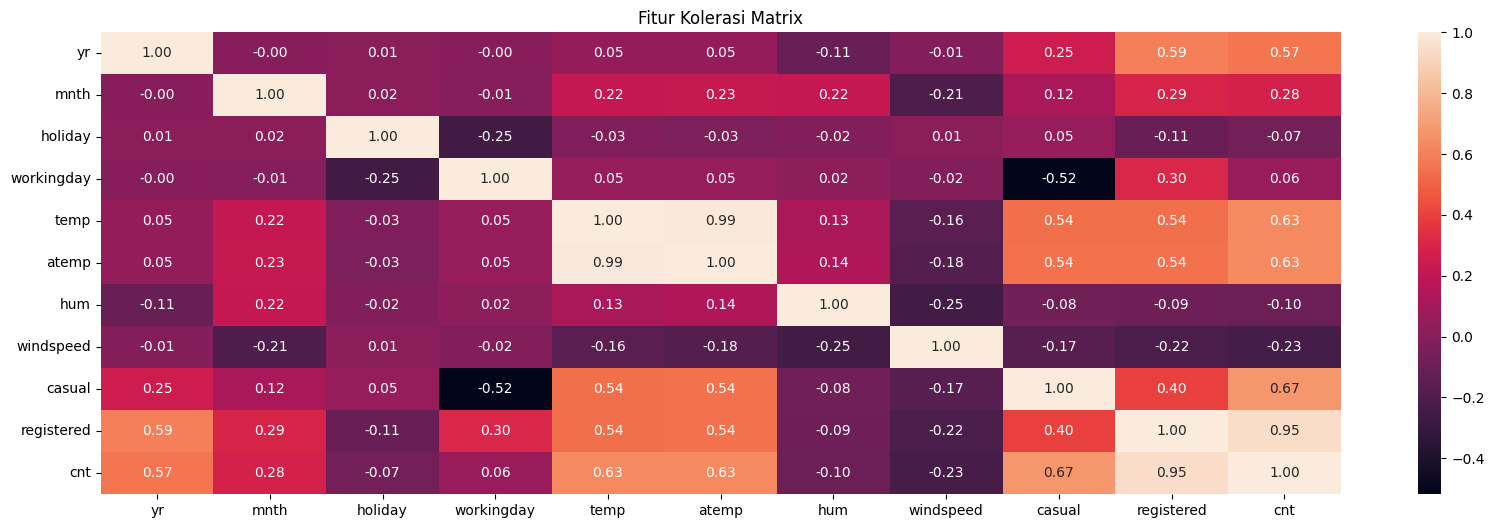

In [23]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_day.select_dtypes(include=np.number).corr(), annot=True, cmap="rocket", fmt=".2f")
plt.title("Fitur Kolerasi Matrix")
plt.show()

**Insight:**
- menemukan tren penjualan pada tahun 2011-2012, dimana ada peminjaman casual dan registered
- melihat bulan peminjaman sepeda paling banyak dan paling sedikit
- peminjaman sepeda paling banyak ada dibulan agustus yaitu dengan total casual 72039 dan registered	279155	dengan cnt 351194
- peminjaman sepeda paling sedikit ada pada bulan januari yaitu dengan total casual 12042 dan registered	122891 dengan cnt	134933
- Dilakukan pengelompokan pada groupby dan melakukan heatmap diakhir agar data bisa lebih dimengerti
- berdasarkan heatmeap cuaca juga mempengaruhi total peminjaman sepeda, cuaca yang hangat meningkatkan jumlah peminjaman dibanding ketika cuaca sedang berangin dan temp nya lebih lembab
- Casual lebih sering bersepeda pada weekend

## Visualization & Explanatory Analysis

### Bagaimana tren jumlah peminjaman sepeda pada tahun 2011-2012

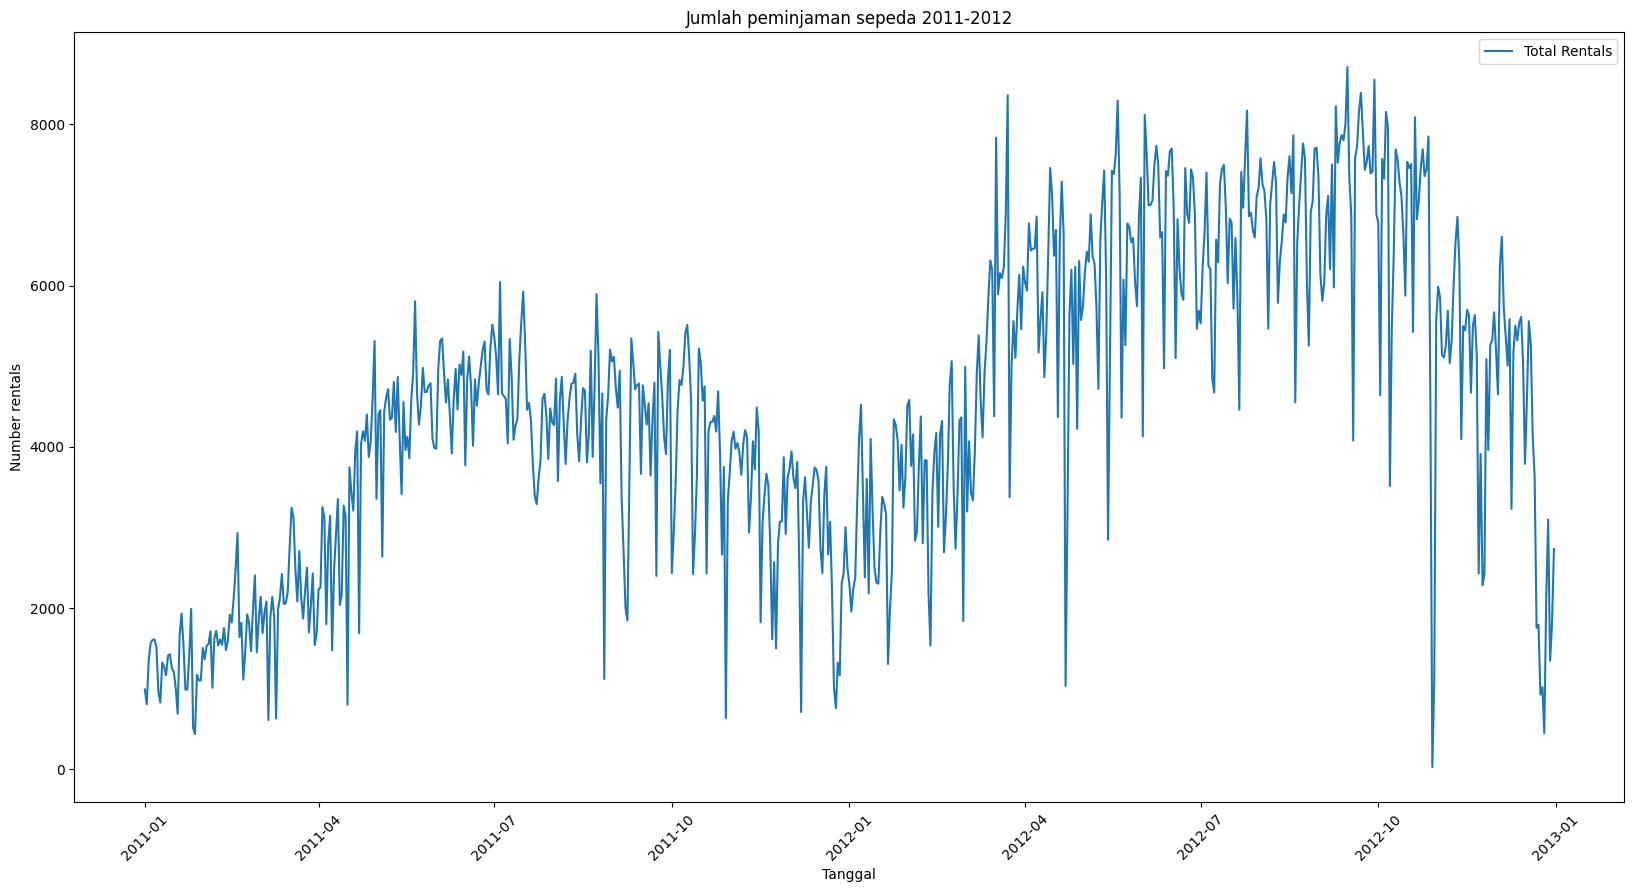

In [24]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_day, x="dteday", y="cnt", label="Total Rentals")
plt.title("Jumlah peminjaman sepeda 2011-2012")
plt.xlabel("Tanggal")
plt.ylabel("Number rentals")
plt.xticks(rotation=45)
plt.show()

### Bulan apa yang memiliki jumlah peminjaman tertinggi dan terendah

In [25]:
df_day["cnt"] = pd.to_numeric(df_day["cnt"], errors="coerce")


In [26]:
monthly_rentals = df_day.groupby("mnth", as_index=False).agg({"cnt": "sum"})


In [27]:
max_month = monthly_rentals.loc[monthly_rentals["cnt"].idxmax(), "mnth"]
max_rentals = monthly_rentals["cnt"].max()
min_month = monthly_rentals.loc[monthly_rentals['cnt'].idxmin(), "mnth"]
min_rentals = monthly_rentals["cnt"].min()

print(f"Bulan yang memiliki peminjaman tertinggi: {max_month} ({max_rentals:,} rentals)")
print(f"Bulan yang memiliki peminjaman terendah : {min_month} ({min_rentals:,} rentals)")


Bulan yang memiliki peminjaman tertinggi: 8 (351,194 rentals)
Bulan yang memiliki peminjaman terendah : 1 (134,933 rentals)


In [28]:
df_day["mnth"] = df_day["dteday"].dt.month

<ipython-input-29-676cf80a5172>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values, palette="flare")


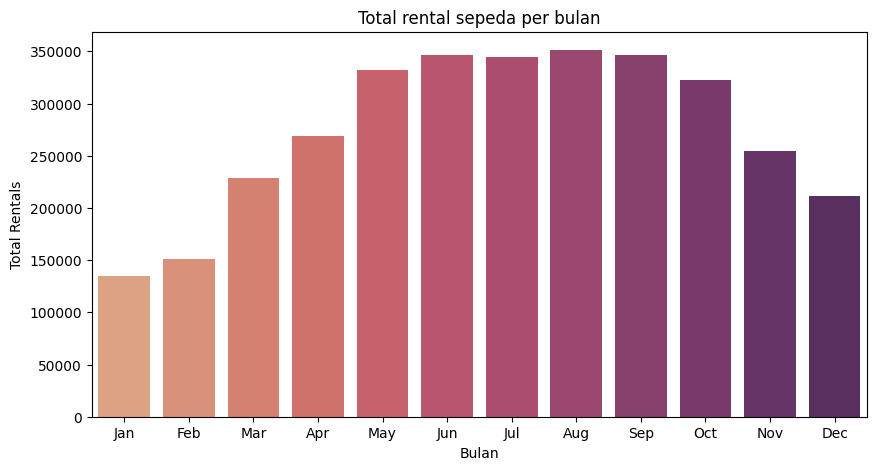

In [29]:
monthly_rentals = df_day.groupby("mnth")["cnt"].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values, palette="flare")
plt.title("Total rental sepeda per bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Rentals")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

**Insight:**
- Pada visualisasi data mengenai tren peminjaman tahun 2011- 2012 menggunakan diagram garis dimana peminjaman meningkat dengan signifikan pada tahun 2012 bulan 04 hingga bulan 10 dan mengalami penurunan pada akhir tahun
- Pada visualisasi data mengenai bulan yang memiliki peminjaman atau penyewaan tertinggi dan terendah menggunakan diagram batang agar lebih mudah difahami audiens
- Bulan dengan jumlah peminjaman tertinggi dan terendah terdapat pada bulan agustus dan jumlah peminjaman terendah di bulan januari

## Analisis Lanjutan (Opsional)

**Analisis pola peminjaman sepeda berdasarkan tren tahun 2011-2012**
Setelah melakukan berbagai analisis data terkait peminjaman terlihat pola yang cukup konsisten antara 2011-2012. Secara umum,peminjaman sepeda mengalami peningkatan secara bertahap sejak awal dan mencapai puncak pada kuartal ketiga sebelum menurun di akhir tahun. Peminjaman di tahun 2012 lebih tinggi dibanding 2011 dihampir setiap bulan artinya, pada tahun 2012 menunjukan adanya peningkatan kesadaran masyarakat terkait peminjaman sepeda dan memungkinkan adanya faktor luar atau eksternal seperti kegiatan even atau kampanye yang membuat masyarakat lebih tertarik dengan menggunakan sepeda

**Analisis peminjaman tertinggi dan terendah**
Bulan dengan peminjaman tertinggi ada pada bulan agustus dan terendah pada bulan agustus dan terendah pada bulan januari.Bulan agustus merupakan dengan kondisi cuaca yang lebih nyaman jadi memungkinkan banyak masyarakat yang mengadakan kegiatan yang memengaruhi peningkatan peminjaman dan pada bulan januari umumnya memiliki suhu yang lebih dingin dan membuat masyarakat lebih jarang menggunakan penyewaan sepeda

**Analisis perbandingan pengguna casual dan registered**
pengguna registered lebih konsisten dalam peminjaman sepeda dalam sepanjang tahun , pengguna casual cenderung meminjam sepeda dalam jumlah besar pada bulan dengan cuaca yang lebih baik dan menurun pada cuaca yang buruk



## Conclusion

### Bagaimana tren jumlah peminjaman pada tahun 2011-2012
Dari hasil analisis diatas bahwa pola peminjaman sepeda menujukan :
- tren peningkatan dari tahun ke tahun, yang bisa menjadi indikasi bahwa masyarakat semakin tertarik pada layanan peminjaman sepeda.
- Peminjaman sepeda cenderung meningkat mulai awal tahun dan mencapai puncak pada pertengahan tahun dan mengalami penurunan di akhir tahun
- peningkatan yang signifikan terlihat pada bulan april hingga september dan mengalami penurunan pada bulan oktober hingga desember
- Lonjakan pada tahub 2012 berkembang lebih pesat dibanding tahun 2011


### Bulan dengan peminjaman Tertinggi dan Terendah
Dari hasil analisis diatas menunjukan bahwa :
- Bulan dengan peminjaman tertinggi = Biasanya terjadi pada bulan januari atau agustus yang kemungkinan disebabkan oleh musim panas dan peningkatan aktivitas luar ruangan
- Bulan dengan peminjaman terendah = Umumnya terjadi pada bulan Januari atau Desember, yang kemungkinan besar disebabkan oleh kondisi cuaca dingin yang kurang mendukung aktivitas bersepeda



**Rekomendasi untuk peningkatan pelayanan peminjaman sepeda**

Berdasarkan analisis 2 pertanyaan diatas yang saling berkolerasi, ada beberapa rekomendasi yang dapat diterapkan pada sistem bisnis agar bisnis berjalan lebih optimal
- Optimasi ketersediaan sepeda pada bulan ramai penyewa dengan menambah jumlah sepeda pada bulan dengan peminatan tinggi
- Strategi peningkatan peminjaman di musim sepi dengan memberikan promo atau diskon di bulan peminjaman rendah agar menarik lebih banyak pengguna
-Penignkatan infrastuktur dan teknologi dengan menyediakan alat pelacak relatime untuk melihat ketersediaan sepeda di berbagai lokasi
- Dengan memberikan point atau cashback untuk pengguna yang sering menyewa sepeda
- Peningkatan Fasilitas penyewaan sepeda atau stasiun guna menambah jumlah tempat penyewaan dengan  lokasi yang strategis seperti sekolah, kantor, kampus, objek wisata dan transportasi umum

In [ ]:
df_day.to_csv("all_data.csv", index=False)